# Linear Regression - Example: Energy Consumption

## Overview
In this notebook, we will walk through a simple example of linear regression using an energy consumption dataset. No prior knowledge of linear regression is assumed. We will:
- Introduce the concept of linear regression
- Load and inspect the energy data
- Visualize relationships between building features and energy use
- Prepare the data and train a linear regression model
- Evaluate model performance and interpret the results

Let’s learn how to use linear regression with a real-world example:

**Can we predict a building’s daily energy consumption (kWh) based on its characteristics?**

## 📊 What’s Linear Regression?
Imagine you’re trying to guess someone’s height based on their age. If you plot those guesses on a chart, linear regression helps draw the best straight line through those points.

That line follows a simple rule: Prediction = starting value + change per unit
- The starting value (β₀) is like where the line begins.
- The change per unit (β₁) says how much the prediction goes up with each step forward.

🔍 So what’s the goal? We want to find the best line that matches the pattern of the data, so our guesses become as close as possible to reality.

## Setting Up Our Data Tools

Before we start working with any data, we need to bring in some helpful tools. These tools let us:
  1. Load and organize information (like a digital spreadsheet).
  2. Create pictures and charts to see patterns.
  3. Build a simple model to make predictions.

In [9]:
# 1. pandas: Think of this as a super-charged spreadsheet inside Python.
#    It helps us read data, sort it, filter it, and do calculations easily.
import pandas as pd

# 2. matplotlib.pyplot: A basic drawing kit for making charts and graphs.
#    We can plot lines, bars, and scatter plots to show our data visually.
import matplotlib.pyplot as plt

# 3. seaborn: Built on top of matplotlib, seaborn makes prettier charts
#    with simpler commands and built-in color themes.
import seaborn as sns

# 4. LinearRegression: This tool builds a straight-line model that
#    tries to predict one number from another (for example, predicting
#    price from size). It finds the best-fitting line through our data.
from sklearn.linear_model import LinearRegression

# 5. r2_score and mean_squared_error: Two ways to measure how well our
#    prediction line matches the real data. 
#    - r2_score tells us the percentage of variation explained.
#    - mean_squared_error tells us how far off, on average, our predictions are.
from sklearn.metrics import r2_score, mean_squared_error

# Loading Our Data Sets

 Now that our tools are ready, we need to bring in the actual information
 we’ll work with. These files are in CSV format (think of them as simple
 text-based spreadsheets). We load two separate tables:
  1. train: the “training” data used to teach our prediction model.
  2. test: the “testing” data used later to check how well our model learned.


In [10]:
# Read the training data file into a pandas “DataFrame” (a table-like object).
train = pd.read_csv('Data/train_energy_data.csv')

# Read the testing data file into another DataFrame.
test  = pd.read_csv('Data/test_energy_data.csv')

# Visualizing Building Size vs. Energy Consumption

Here we draw a scatter plot to explore how a building’s square footage relates to its energy usage. Each dot represents one building, with its position showing size on the horizontal axis and energy use on the vertical axis. Coloring by building type helps us spot patterns by category, and a bit of transparency makes overlapping points easier to see.

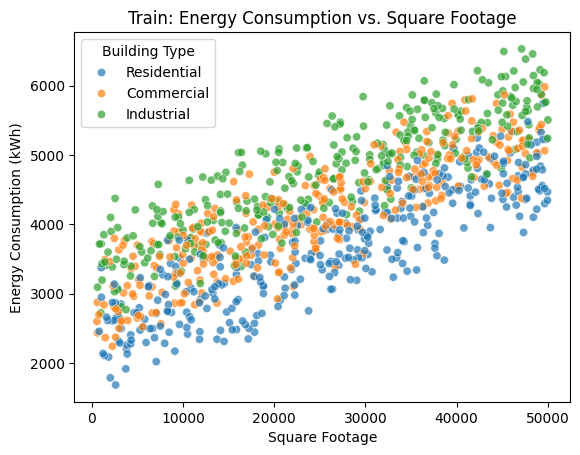

In [11]:
sns.scatterplot(
    data=train,                 # Use our training data table
    x='Square Footage',         # Horizontal axis: building size
    y='Energy Consumption',     # Vertical axis: energy used
    hue='Building Type',        # Color points by building category
    alpha=0.7                   # Make points slightly transparent
)

# Add a title and labels to make the chart understandable
plt.title('Train: Energy Consumption vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption (kWh)')

# Display the completed plot on screen
plt.show()

# Preparing Data for the Prediction Model

 Before our model can learn to predict energy use, we need to turn all our information into numbers and line up the training and testing tables. We will:
   1. Convert the day names into separate yes/no columns.
   2. Ensure the test table has the same columns as the train table.
   3. Choose which columns (features) the model will use to learn.
   4. Separate those features (X) from the value we want to predict (y).


In [13]:
# 1) Turn "Day of Week" into yes/no columns using one-hot encoding.
# For example, "Monday" becomes a column where 1 means it's Monday, 0 means it's not.
train_data = pd.get_dummies(train, columns=['Day of Week'], drop_first=True)
test_data  = pd.get_dummies(test,  columns=['Day of Week'], drop_first=True)

# 2) Make sure test_data has the same columns as train_data.
# If a weekday is missing in test_data, fill its column with 0s.
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# 3) Choose which features the model should look at when predicting.
# Includes regular numeric inputs plus the weekday yes/no columns.
input_features = [
    'Square Footage',
    'Number of Occupants',
    'Appliances Used',
    'Average Temperature'
] + [column for column in train_data.columns if column.startswith('Day of Week_')]

# 4) Split data into inputs (X) and targets (y).
# X = what the model uses to make predictions
# y = the actual energy use it tries to predict
X_train = train_data[input_features]
y_train = train_data['Energy Consumption']

X_test  = test_data[input_features]
y_test  = test_data['Energy Consumption']

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# display learned coefficients
coefs = pd.Series(model.coef_, index=feature_cols)
print("Feature coefficients:")
print(coefs.sort_values(ascending=False))
print(f"Intercept: {model.intercept_:.2f}")

Feature coefficients:
Appliances Used        20.701303
Number of Occupants    10.346995
Square Footage          0.050249
Average Temperature    -5.297753
Day of Week_Weekend   -28.653939
dtype: float64
Intercept: 1990.12


# Evaluating Our Model’s Performance

 After training our model, we check how well it predicts energy use on new, unseen buildings. We will:
   1. Ask the model to make predictions.
   2. Calculate two simple scores:
      - R²: how much of the real-world ups-and-downs we captured.
      - MSE: how big our average prediction mistakes are.
   3. Print those scores for a quick summary.
   4. Draw a chart that lines up actual vs. predicted values to
      visually inspect where we’re doing well or off-target.

R² score on test data: 0.73
Mean Squared Error: 185193.92


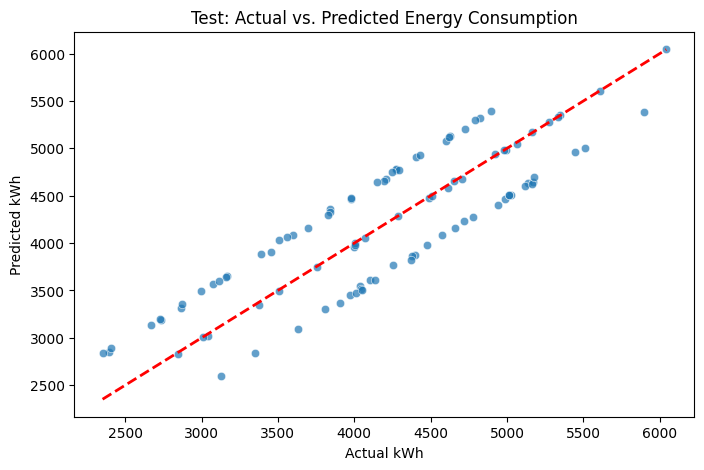

In [6]:
# 1) Ask the model to predict energy consumption on the test set
y_pred = model.predict(X_test)

# 2) Measure performance with R² (closer to 1 is better)
r2  = r2_score(y_test, y_pred)

#    and Mean Squared Error (smaller is better)
mse = mean_squared_error(y_test, y_pred)

# 3) Show the results in the console
print(f"R² score on test data: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# 4) Plot actual vs. predicted to see how predictions stack up
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Draw a diagonal red dashed line representing perfect predictions
plt.plot(
    [y_test.min(), y_test.max()],    # from lowest to highest actual value
    [y_test.min(), y_test.max()],    # same range for predicted
    'r--', lw=2                      # red dashed line, width 2
)

# Add informative title and axis labels
plt.title('Test: Actual vs. Predicted Energy Consumption')
plt.xlabel('Actual kWh')
plt.ylabel('Predicted kWh')

# Display the plot
plt.show()

# Interpreting Model Predictions and Key Influencers

At this stage, we want to:
   1. Ask our trained model to predict energy use on the test data.
   2. See how accurate those predictions are with two simple scores.
   3. Find out which building factors push energy use up or down the most.
   4. Print everything in an easy-to-read format.

In [7]:
# 1) Use the model to predict energy consumption for each test example
y_pred = model.predict(X_test)

# 2) Measure prediction accuracy:
#    - R² score: the percent of variation captured (closer to 1 is better)
#    - Mean Squared Error: average size of prediction errors (smaller is better)
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 3) Examine model coefficients to see which features influence energy use:
#    - Create a labeled series pairing each feature with its coefficient
#    - Sort to find top 5 positive drivers (raise consumption)
#    - Sort to find top 5 negative drivers (lower consumption)
coef_series   = pd.Series(model.coef_, index=feature_cols)
top_positive  = coef_series.sort_values(ascending=False).head(5)
top_negative  = coef_series.sort_values().head(5)

# 4) Display the summary:
#    - Print the two accuracy scores
#    - Show the 5 strongest positive and negative factors in a simple table
print(f"R² score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}\n")

print("Top 5 Positive Drivers:")
print(top_positive.to_markdown())

print("\nTop 5 Negative Drivers:")
print(top_negative.to_markdown())

R² score: 0.73
Mean Squared Error: 185193.92

Top 5 Positive Drivers:
|                     |           0 |
|:--------------------|------------:|
| Appliances Used     |  20.7013    |
| Number of Occupants |  10.347     |
| Square Footage      |   0.0502493 |
| Average Temperature |  -5.29775   |
| Day of Week_Weekend | -28.6539    |

Top 5 Negative Drivers:
|                     |           0 |
|:--------------------|------------:|
| Day of Week_Weekend | -28.6539    |
| Average Temperature |  -5.29775   |
| Square Footage      |   0.0502493 |
| Number of Occupants |  10.347     |
| Appliances Used     |  20.7013    |


## 📊 Linear Regression Analysis of Energy Consumption

### Model Performance

- **R² Score**: `0.73`  
  → The model explains **73%** of the variability in energy consumption based on the provided features.
- **Mean Squared Error**: `185193.92`  
  → On average, predictions deviate by around **430 kWh**, suggesting moderate error that may stem from outliers or non-linear patterns.

---

### 🔍 Feature Impact Summary

| Feature               | Coefficient | Interpretation                                 |
|-----------------------|------------:|------------------------------------------------|
| Appliances Used       |   20.70     | Each additional appliance increases usage ~21 kWh/day |
| Number of Occupants   |   10.35     | Each occupant contributes ~10 kWh/day         |
| Square Footage        |    0.05     | Slight increase in energy use per ft²         |
| Average Temperature   |   –5.30     | Warmer days reduce consumption ~5.3 kWh/°C     |
| Day of Week: Weekend  |  –28.65     | Weekend usage drops by ~29 kWh compared to weekdays |

✅ **Positive Drivers**:  
- Appliance count and occupancy are the most influential in raising energy demand.  
- Larger buildings have modestly higher consumption, likely due to spatial coverage.

❄️ **Negative Drivers**:  
- Higher temperatures correlate with **lower** usage—likely due to reduced heating needs.  
- Weekends significantly reduce consumption, possibly due to decreased human activity in commercial or industrial zones.

---

### ✨ Insights & Recommendations

- **Energy Efficiency Strategy**: Focus on optimizing appliance usage and occupant behavior to reduce overall demand.
- **Temperature Sensitivity**: Buildings might benefit from automated climate control to balance temperature effects.
- **Weekend Dip**: Exploitable for load balancing and utility pricing incentives (e.g. shifting energy-intensive tasks to weekends).